In [1]:
import os
import sys

# Set working directory
plant_clef_root = '/home/ffw/workspace/plantCLEF/'
os.chdir(plant_clef_root)

data_dir = os.path.join(plant_clef_root, 'data')

In [2]:
import numpy as np
import sklearn
import scipy
import scipy.misc
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from utilities import *

In [4]:
# Add the scatnet implementation to the system path
scatnet_path = '/home/ffw/workspace/thesis_scatnet/'
if scatnet_path not in sys.path:
    sys.path.append(scatnet_path)

import scattconvnet

In [5]:
s = scattconvnet.scatnet.ScatNet(nangles=4, scale=3, max_order=2, return_response=False)

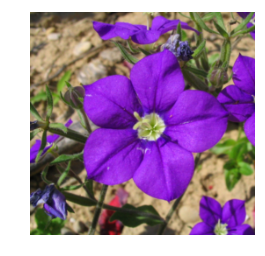

In [6]:
img = scipy.misc.imread('data/train/4013.jpg')[:600,:600,:]
img = scipy.misc.imresize(img,size=(256,256))
img = img[:,:,[0,1,2]]
plt.imshow(img[:,:,:]);
plt.axis('off');

In [7]:
#t0 = time.time()
#res = s.process(img)
#dt = time.time() - t0
#print "took %.0f ms" % (1000*dt)

In [8]:
#res_small = res[0:225,::1,::1].copy()
#for r in res_small:
#    r /= r.max()

#plt.figure(figsize=(20,20))
#vis_square(res_small)

In [102]:
import caffe
#caffe.set_mode_cpu
caffe.set_mode_gpu
caffe.set_device(0)
from caffe import layers as L
from caffe import params as P
import tempfile

In [103]:

from mcl.nets import scatnet_net, species_net
reload(scatnet_net)
reload(species_net)

data, labels = species_net.get_data_layer('data/small_train.txt', mirror=False)

net = caffe.Net(scatnet_net.wavelet_layer(data=data), caffe.TEST)


In [104]:
print "shape: %s" % str(net.params['conv1'][0].data.shape)

w = scattconvnet.wavelet.morlet(2,0)
net.params['conv1'][0].data[0,0,:,:] = np.real(w)
net.params['conv2'][0].data[0,0,:,:] = np.imag(w)

shape: (1, 3, 16, 16)


In [105]:
img_t = img.transpose(2,0,1)
img_t = np.reshape(img_t, (3,1,256,256))

#input_blob = net.blobs['data']
#net.blobs['data'].data[:, ...] = img_t

t0 = time.time()
for i in range(1):
    res_out = net.forward()
print "Took %.1fms" % ((time.time() - t0) / 50 * 1000)

res = res_out['sqrt'].transpose(2,3,0,1)[:,:,:,0]


Took 96.2ms


Took 23.0ms


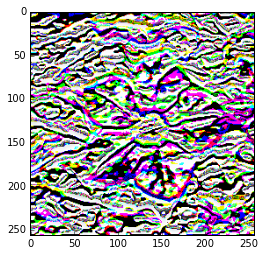

In [99]:
t0 = time.time()
for i in range(10):
    res2 = np.abs(scattconvnet.scatnet.conv(img, w))
print "Took %.1fms" % ((time.time() - t0) / 10 * 1000)

plt.imshow(res2)


In [70]:
nimages = 30000
dim = 350
print "%.2f hours" % (23.7*dim*nimages / 1000 / 3600)
print 128*128*4*dim * nimages * 2**-30

69.12 hours
640.869140625


(212, 212)


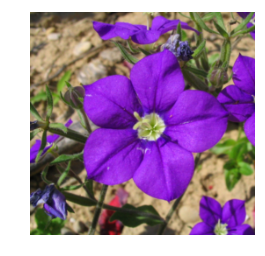

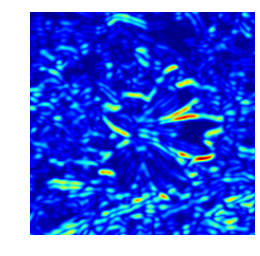

In [63]:
res_img = res[:,:,5].copy()

res_img += res_img.min()
res_img /= res_img.max()

print res_img.shape

plt.imshow(img[:,:,:]);
plt.axis('off');
plt.show()
plt.imshow(res_img[:,:])
#plt.imshow(res_img[:,:,:])
plt.axis('off');
plt.show()

In [14]:
res.max()

1.0